In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

with open("balancedFIR128_150_res.json") as f:
    balancedRes = json.load(f)

with open("regularFIR128_res.json") as f:
    regularRes = json.load(f)

balancedSteps = np.array(balancedRes["steps"])
balancedComms = np.array(balancedRes["communications"])

regularSteps = np.array(regularRes["steps"])
regularComms = np.array(regularRes["communications"])

In [ ]:
offset_y = balancedComms - regularComms
offset_x = balancedSteps - regularSteps

ang = np.arctan2(offset_x, offset_y) * (180/np.pi)

steps = np.linspace(-172.5, 172.5, 24)
count = []
# count.append(np.sum(ang < steps[0]))
for lower, upper in zip(steps[:-1], steps[1:]):
  count.append(np.sum((ang >=lower) * (ang < upper)))

count.append(np.sum(ang >= steps[-1]) + np.sum(ang < steps[0]))

angle = steps+7.5

In [ ]:
def count_per_val(steps, comms):
  c = {}
  for step, comm in zip(steps, comms):
    if (step, comm) in c.keys():
      c[(step, comm)] += 1
    else:
      c[(step, comm)] = 1

  ret = [[int(step), int(comm), c[(step, comm)]] for (step, comm) in c.keys()]

  return np.array(ret)

def count_to_size(counts):
  min_cnt = np.min(counts)
  max_cnt = np.max(counts)
  to_size = lambda x : int(((x - min_cnt) / (max_cnt - min_cnt)) * 10 + 2)

  return np.array(list(map(to_size, counts)))


def scatter_comm_step(ax, comms, steps, color, alpha=1):
  cnts = count_per_val(steps, comms)
  steps, comms, cnts = cnts[:, 0], cnts[:, 1], cnts[:, 2]
  sizes = count_to_size(cnts)
  ax.scatter(comms, steps, s=sizes, color=color, alpha=alpha)

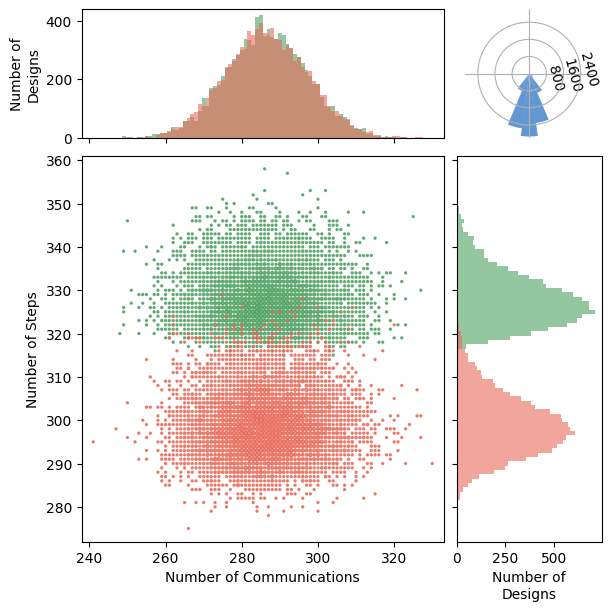

In [ ]:
regularColor  = "#4DA060"
balancedColor = "#E86A58"
dirColor = "#6298D2"

fig, axs = plt.subplot_mosaic(
    [['histComm', 'transDir'],
    ['dsSample', 'histSteps']],
    figsize=(6, 6),
    width_ratios=(3, 1.2), height_ratios=(1, 3),
    layout='constrained',
    per_subplot_kw = {"transDir":{"polar":True}})

dsSampleXLower = int(np.min(np.concatenate([regularComms, balancedComms])))
dsSampleXHigher = int(np.max(np.concatenate([regularComms, balancedComms])))

dsSampleYLower = int(np.min(np.concatenate([regularSteps, balancedSteps])))
dsSampleYHigher = int(np.max(np.concatenate([regularSteps, balancedSteps])))

axs["dsSample"].set_xlim((dsSampleXLower-3, dsSampleXHigher+3))
axs["dsSample"].set_ylim((dsSampleYLower-3, dsSampleYHigher+3))
axs["dsSample"].set_xlabel("Number of Communications")
axs["dsSample"].set_ylabel("Number of Steps")
scatter_comm_step(axs["dsSample"], regularComms, regularSteps, color=regularColor, alpha=0.8)
scatter_comm_step(axs["dsSample"], balancedComms, balancedSteps, color=balancedColor, alpha=0.8)
#axs["dsSample"].scatter(regularComms, regularSteps, alpha=0.8, color=regularColor, s=2)
#axs["dsSample"].scatter(balancedComms,balancedSteps, alpha=0.8, color=balancedColor, s=2)

binsx = np.arange(dsSampleXLower-3, dsSampleXHigher+3) - 0.5
axs["histComm"].tick_params(axis="x", labelbottom=False)
axs["histComm"].set_xlim((dsSampleXLower-3, dsSampleXHigher+3))
axs["histComm"].set_ylabel("Number of\nDesigns")
_ = axs["histComm"].hist(regularComms, binsx, alpha=0.6, color=regularColor)
_ = axs["histComm"].hist(balancedComms, binsx, alpha=0.6, color=balancedColor)

binsy = np.arange(dsSampleYLower-3, dsSampleYHigher+3) - 0.5
axs["histSteps"].tick_params(axis="y", labelleft=False)
axs["histSteps"].set_ylim((dsSampleYLower-3, dsSampleYHigher+3))
axs["histSteps"].set_xlabel("Number of\nDesigns")
_ = axs["histSteps"].hist(regularSteps, binsy, alpha=0.6, orientation='horizontal', color=regularColor)
_ = axs["histSteps"].hist(balancedSteps, binsy, alpha=0.6, orientation='horizontal',color=balancedColor)

axs["transDir"].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

axs["transDir"].tick_params(
    axis='y',          # changes apply to the y-axis
    rotation=-75
    ) # labels along the bottom edge are off

axs["transDir"].set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])

axs["transDir"].set_ylim([0, 3000])
axs["transDir"].set_yticks([800, 1600, 2400])#, ["500", "1000", "1500", "Number of\nDesigns\n2000"])

axs["transDir"].spines['polar'].set_visible(False)

#ax.set_ylabel("Number of\nDesigns", labelpad=25, rotation=-75)
#ax.yaxis.set_label_position('right')

_ = axs["transDir"].bar((angle*(np.pi/180)), count, width=np.pi/12+0.01, color=dirColor)

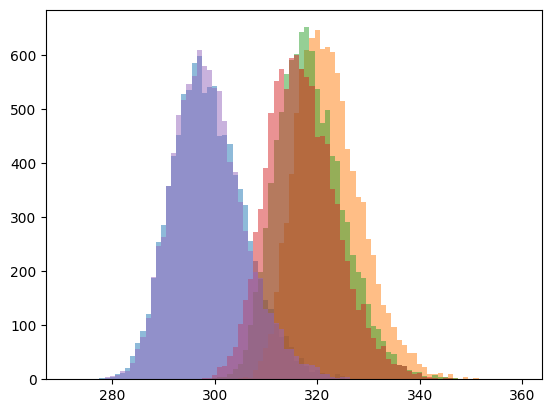

In [67]:
with open("balancedFIR128_150_res.json") as f:
    balancedRes_150 = json.load(f)

with open("balancedFIR128_100_res.json") as f:
    balancedRes_100 = json.load(f)

with open("balancedFIR128_50_res.json") as f:
    balancedRes_50 = json.load(f)

with open("balancedFIR128_75_res.json") as f:
    balancedRes_75 = json.load(f)

with open("balancedFIR128_110_res.json") as f:
    balancedRes_110 = json.load(f)

with open("balancedFIR128_115_res.json") as f:
    balancedRes_115 = json.load(f)

with open("balancedFIR128_120_res.json") as f:
    regularRes = json.load(f)

balancedSteps_150 = np.array(balancedRes_150["steps"])
balancedSteps_100 = np.array(balancedRes_100["steps"])
balancedSteps_50 = np.array(balancedRes_50["steps"])
balancedSteps_75 = np.array(balancedRes_75["steps"])
balancedSteps_110 = np.array(balancedRes_110["steps"])
balancedSteps_115 = np.array(balancedRes_115["steps"])
regularSteps = np.array(regularRes["steps"])

_ = plt.hist(regularSteps, binsy, alpha=0.5)
#_ = plt.hist(balancedSteps_50, binsy, alpha=0.5)
#_ = plt.hist(balancedSteps_75, binsy, alpha=0.5)
_ = plt.hist(balancedSteps_100, binsy, alpha=0.5)
_ = plt.hist(balancedSteps_110, binsy, alpha=0.5)
_ = plt.hist(balancedSteps_115, binsy, alpha=0.5)
_ = plt.hist(balancedSteps, binsy, alpha=0.5)


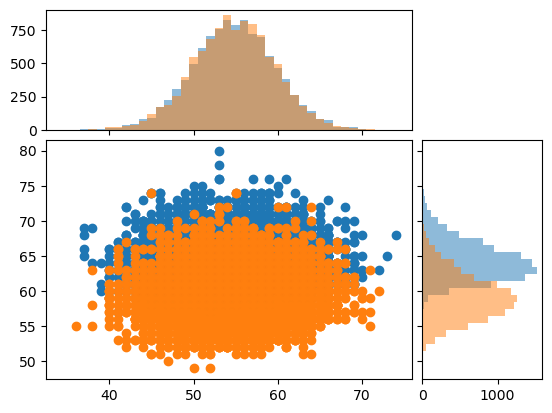

In [ ]:
fig, ax = plt.subplots()

ax.scatter(regularComms, regularSteps, alpha=1)
ax.scatter(balancedComms, balancedSteps, alpha=1)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

_ = ax_histx.hist(regularComms, np.linspace(34.5, 72.5, 39), alpha=0.5)
_ = ax_histx.hist(balancedComms, np.linspace(34.5, 72.5, 39), alpha=0.5)

_ = ax_histy.hist(regularSteps, np.linspace(49.5, 75.5, 27), alpha=0.5, orientation='horizontal')
_ = ax_histy.hist(balancedSteps, np.linspace(49.5, 75.5, 27), alpha=0.5, orientation='horizontal')

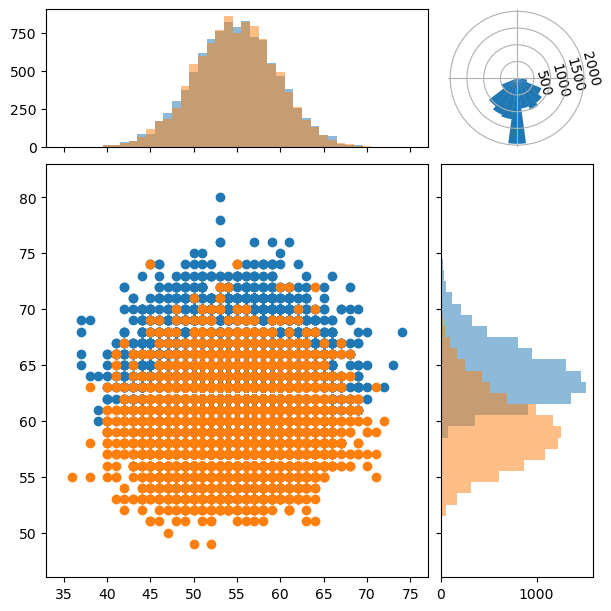